In [ ]:
from flash_ansr import FlashANSR, GenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from drawdata import ScatterWidget

In [ ]:
# MODEL = "psaegert/flash-ansr-v7.0"
MODEL = "ansr-models/v16.0/checkpoint_200000"

In [ ]:
# install_model(MODEL)

In [ ]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    # generation_config=GenerationConfig(method='beam_search', beam_width=128 * 16, equivalence_pruning=True),
    generation_config=GenerationConfig(method='softmax_sampling', choices=1024 * 32),
    parsimony=0.05
).to(device)

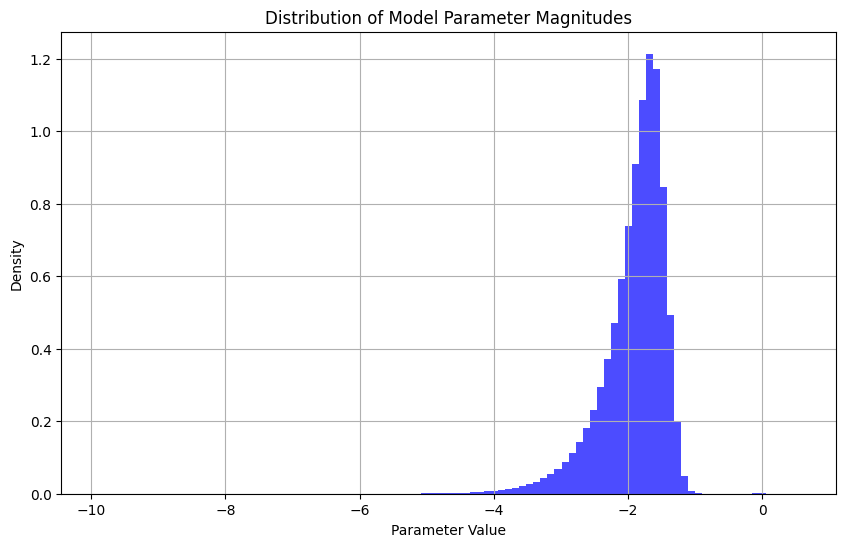

In [ ]:
# [p for p in nsr.flash_ansr_transformer.parameters()]

# Plot the distribution of magnitudes of all parameters in the model
all_params = torch.cat([p.detach().flatten().abs().log10().cpu() for p in nsr.flash_ansr_transformer.parameters()])
plt.figure(figsize=(10, 6))
plt.hist(all_params.numpy(), bins=100, density=True, alpha=0.7, color='blue')
plt.title('Distribution of Model Parameter Magnitudes')
plt.xlabel('Parameter Value')
plt.ylabel('Density')
plt.grid(True)

In [ ]:
# How many parameters are larger than 1e-1?
threshold = 10
num_large_params = (all_params > np.log10(threshold)).sum().item()
total_params = all_params.numel()
print(f"Number of parameters larger than {threshold}: {num_large_params} out of {total_params} ({(num_large_params / total_params) * 100:.2f}%)")

Number of parameters larger than 10: 0 out of 446727168 (0.00%)
